In [42]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# read data into a DataFrame
data = pd.read_csv(r"/content/drive/MyDrive/Machine Learning/Data Sets/train_loan.csv")
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
type(data)

pandas.core.frame.DataFrame

In [45]:
data.shape

(614, 13)

In [46]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
data = data.dropna()

In [49]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
data.shape

(480, 13)

In [51]:
data.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)

<ipython-input-51-1c6cfd868798>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"Loan_Status":{"N":0,"Y":1}},inplace = True)


In [52]:
data.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


In [53]:
data.nunique()


Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [54]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [55]:
data.replace({"Dependents":{"3+":4}}, inplace = True)

In [56]:
data["Dependents"].value_counts( )

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Visualizations

<Axes: xlabel='Education', ylabel='count'>

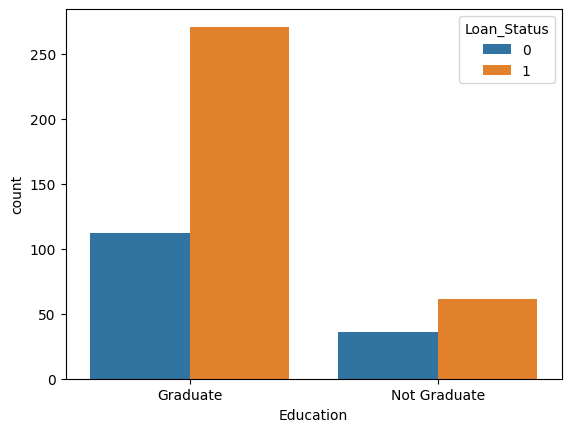

In [57]:
# education and loan status
sns.countplot(x = "Education", hue = "Loan_Status", data = data )

<Axes: xlabel='Married', ylabel='count'>

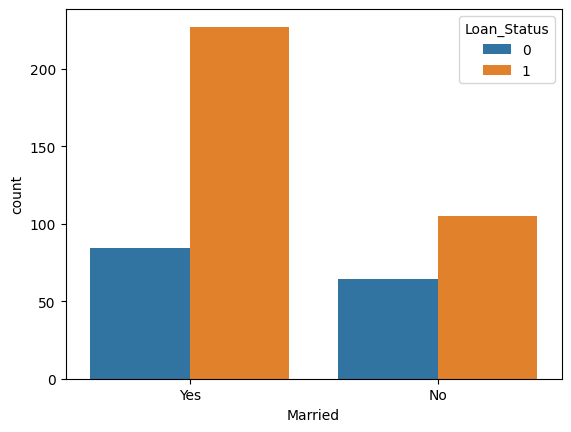

In [58]:
sns.countplot(x = "Married", hue = "Loan_Status", data = data )


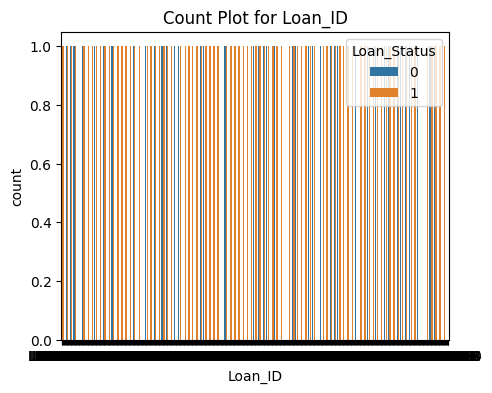

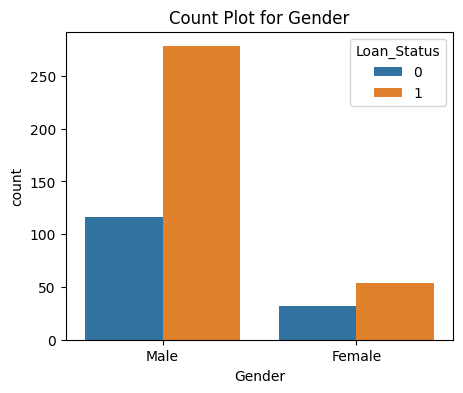

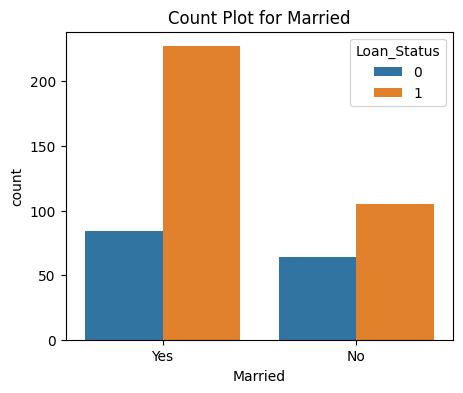

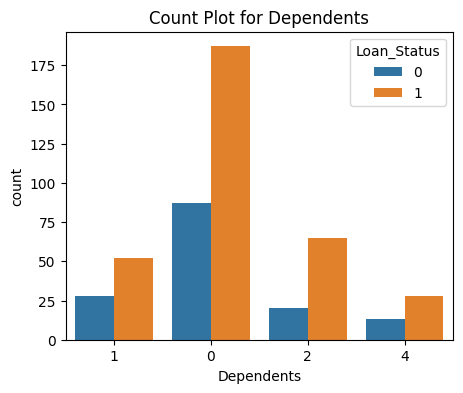

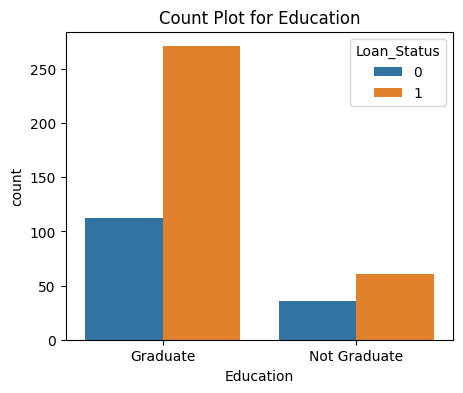

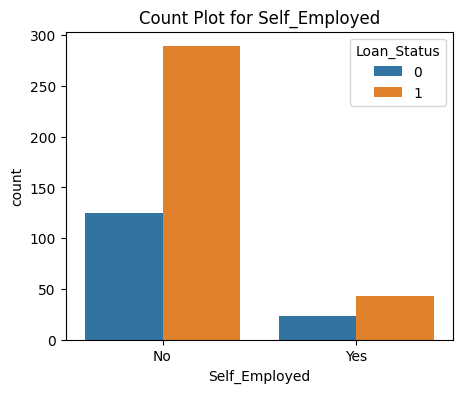

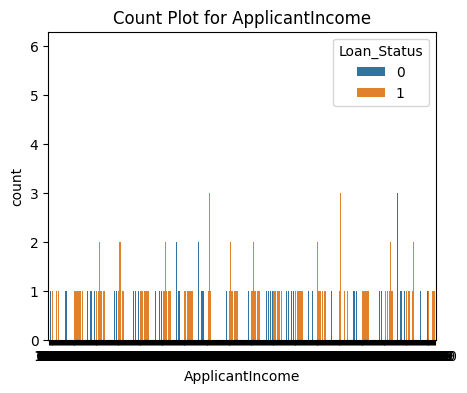

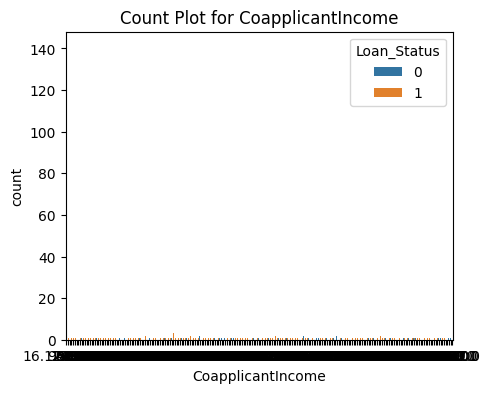

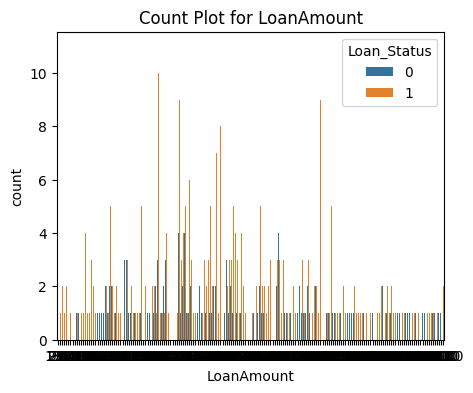

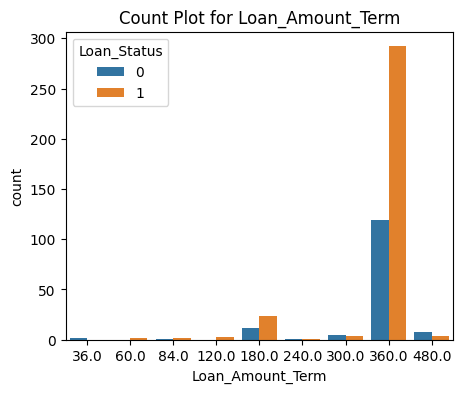

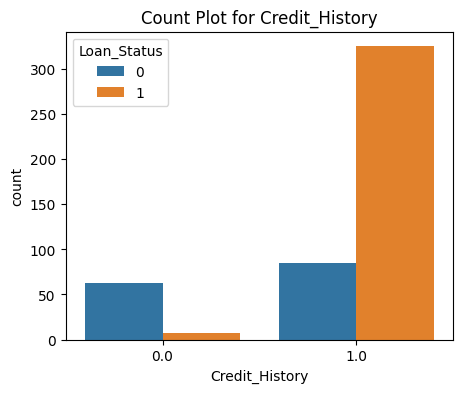

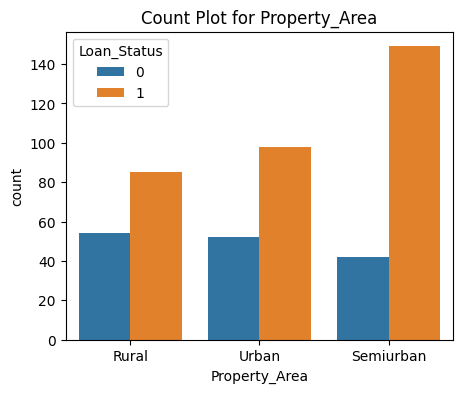

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.columns:
    if column != "Loan_Status":  # Exclude the target column
        plt.figure(figsize=(5, 4))
        sns.countplot(x=column, hue="Loan_Status", data=data)
        plt.title(f"Count Plot for {column}")
        plt.show()


In [60]:
data.replace({
              "Married":{"No" : 0,  "Yes" : 1},
              "Gender":{"Male" : 1, "Female" : 0},
              "Self_Employed":{"No" : 0, "Yes" : 1},
              "Property_Area":{"Rural" : 0, "Semiurban" : 1,"Urban" : 2},
              "Education":{"Graduate" : 1, "Not Graduate" : 0}}, inplace = True)

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [62]:
# separating the data and label
X = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data['Loan_Status']

In [63]:
data["Gender"].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 52.5+ KB


In [67]:
data.duplicated().sum()

0

In [68]:
X.shape,Y.shape

((480, 11), (480,))

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
ss = scaler.transform(X)
ss

array([[ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -1.31886834],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       ...,
       [ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237,  0.92945899, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348, -0.02954695]])

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print(lr.score(X_train,Y_train))

0.8203125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
Y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0])

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[14 23]
 [ 1 58]]
0.75
              precision    recall  f1-score   support

           0       0.93      0.38      0.54        37
           1       0.72      0.98      0.83        59

    accuracy                           0.75        96
   macro avg       0.82      0.68      0.68        96
weighted avg       0.80      0.75      0.72        96



In [94]:
Y_pred_prob = lr.predict_proba(X_test)
Y_pred_prob

array([[0.20072068, 0.79927932],
       [0.76553459, 0.23446541],
       [0.36987706, 0.63012294],
       [0.03242606, 0.96757394],
       [0.21165428, 0.78834572],
       [0.19255632, 0.80744368],
       [0.43697417, 0.56302583],
       [0.11743627, 0.88256373],
       [0.16495264, 0.83504736],
       [0.10895131, 0.89104869],
       [0.14186188, 0.85813812],
       [0.1133044 , 0.8866956 ],
       [0.25720638, 0.74279362],
       [0.13147159, 0.86852841],
       [0.71150653, 0.28849347],
       [0.23428678, 0.76571322],
       [0.40716328, 0.59283672],
       [0.16586389, 0.83413611],
       [0.09975178, 0.90024822],
       [0.73051418, 0.26948582],
       [0.30435413, 0.69564587],
       [0.50225092, 0.49774908],
       [0.15626335, 0.84373665],
       [0.09900596, 0.90099404],
       [0.29146086, 0.70853914],
       [0.14099583, 0.85900417],
       [0.40791749, 0.59208251],
       [0.20868585, 0.79131415],
       [0.17244247, 0.82755753],
       [0.12072473, 0.87927527],
       [0.

<ipython-input-33-bea5571c7c54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr(method = "pearson")


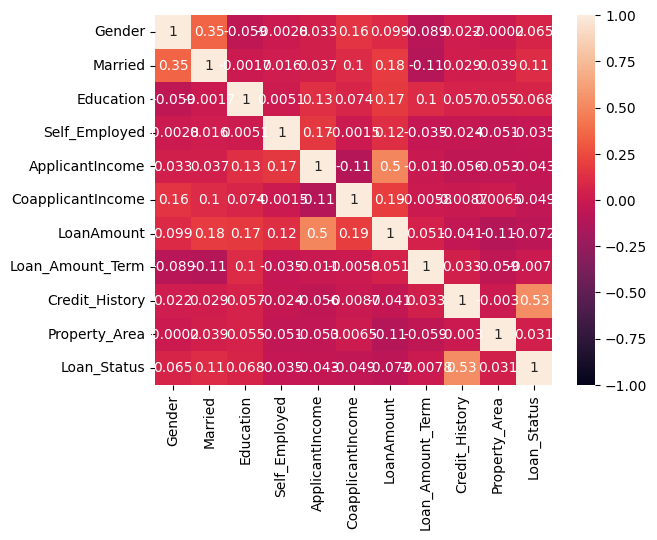

In [88]:
correlation = data.corr(method = "pearson")
correlation


sns.heatmap(correlation,vmax=1.0, vmin = -1.0, annot = True)
plt.show()



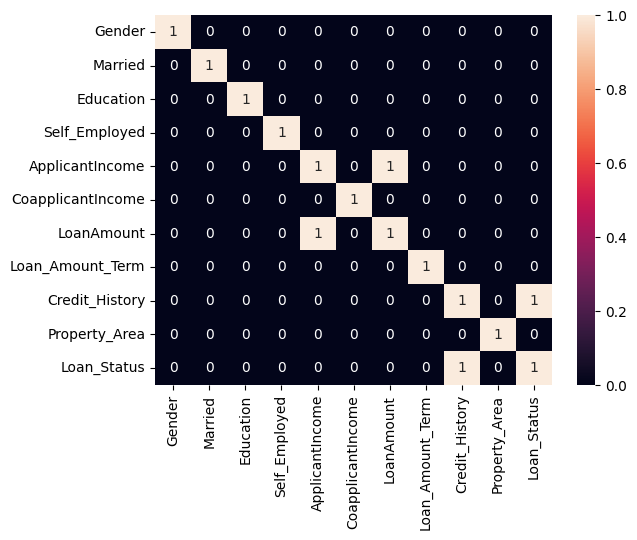

In [85]:
sns.heatmap(correlation.corr()> 0.7, annot = True)
plt.show()

In [95]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.7036188731103986


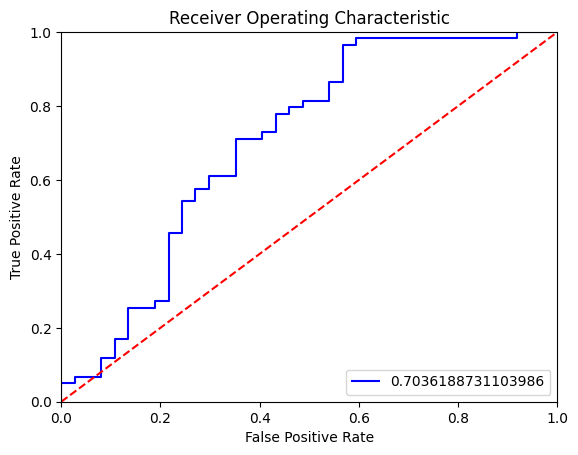

In [96]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()